## IMPORTING ALL THE REQUIRED LIBRARIES


In [1]:
# ==============================
# 📦 Data Handling
# ==============================
import os
import json
import warnings
import pandas as pd
import numpy as np
from scipy.stats import zscore
# ==============================
# 🎨 Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

## Reading csv file


In [6]:
df = pd.read_csv(r"C:\Users\Minfy.CHILUKURIVASUSR\Desktop\Lead Prediction\Lead Scoring copy.csv")


In [7]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## THE  BELOW CELL GIVES THE NA% IN EACH COLUMN 

In [10]:
na_percent = df.isna().mean().multiply(100).round(2).sort_values(ascending=False)

print(na_percent)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

## FINDING THE SKEWNESS VALUES IN NUMERICAL COLUMNS

In [12]:
# Select numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness
skewness_values = numeric_cols.skew()

# Display skewness
print(skewness_values)

Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
dtype: float64


## IN THE ABOVE CELL OUTPUT IF THE SKEWNESS IS IN BETWEEN -0.5 to +0.5 IT IS LESS SKEWED AND THE DATA IS NORMALLY DISTRIBUTED.


✅ Saved histogram: eda_plots/univariate_analysis\univariate_hist_Converted.png
✅ Saved boxplot: eda_plots/univariate_analysis\univariate_box_Converted.png
📊 Descriptive Statistics for Converted:
count    9240.000000
mean        0.385390
std         0.486714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

✅ Saved histogram: eda_plots/univariate_analysis\univariate_hist_TotalVisits.png
✅ Saved boxplot: eda_plots/univariate_analysis\univariate_box_TotalVisits.png
📊 Descriptive Statistics for TotalVisits:
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

✅ Saved histogram: eda_plots/univariate_analysis\univariate_hist_Total Time Spent on Website.png
✅ Saved boxplot: eda_plots/univariate_analysis\univariate_box_Total Time Spent on Website.png
📊 Descrip

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


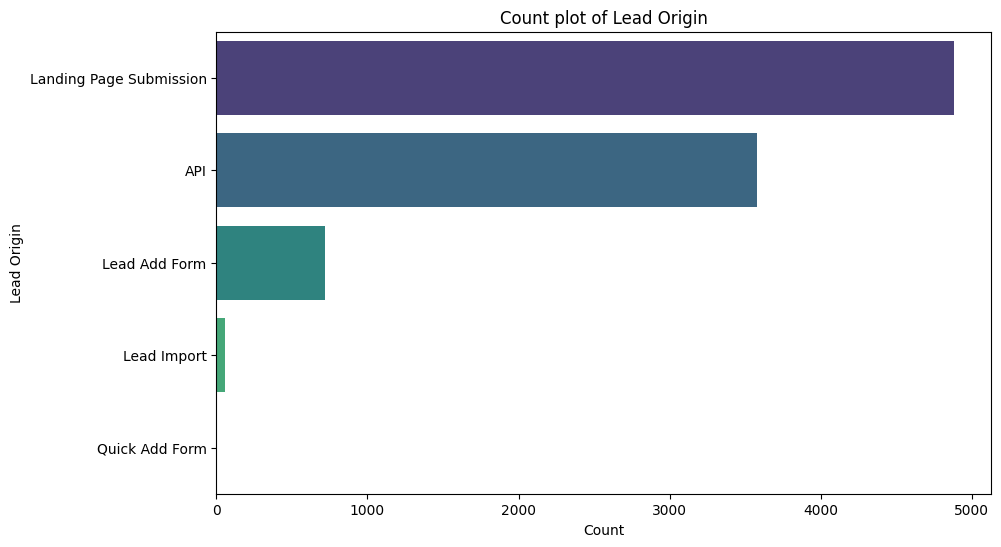

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Lead Origin.png
📊 Value Counts for Lead Origin:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

📊 Proportions for Lead Origin:
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


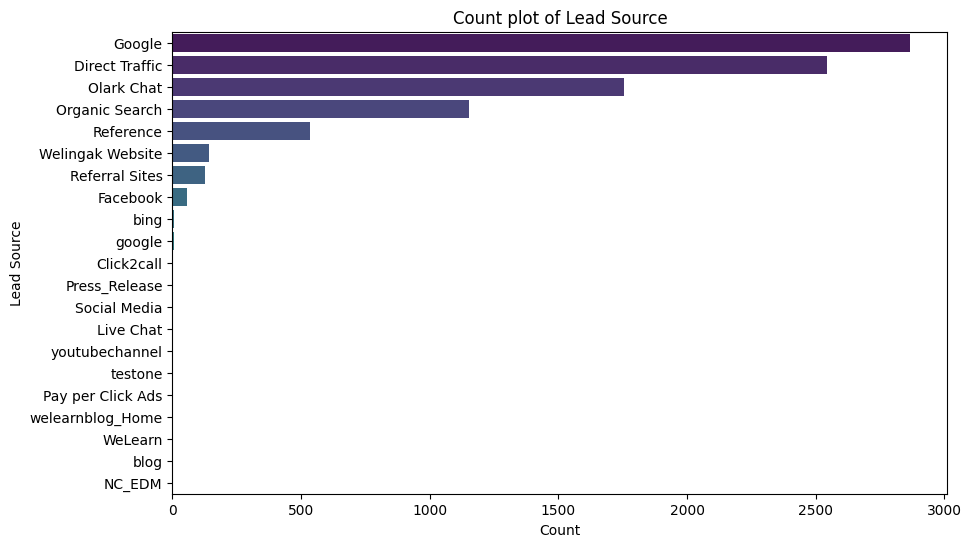

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Lead Source.png
📊 Value Counts for Lead Source:
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

📊 Proportions for Lead Source:
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing              

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


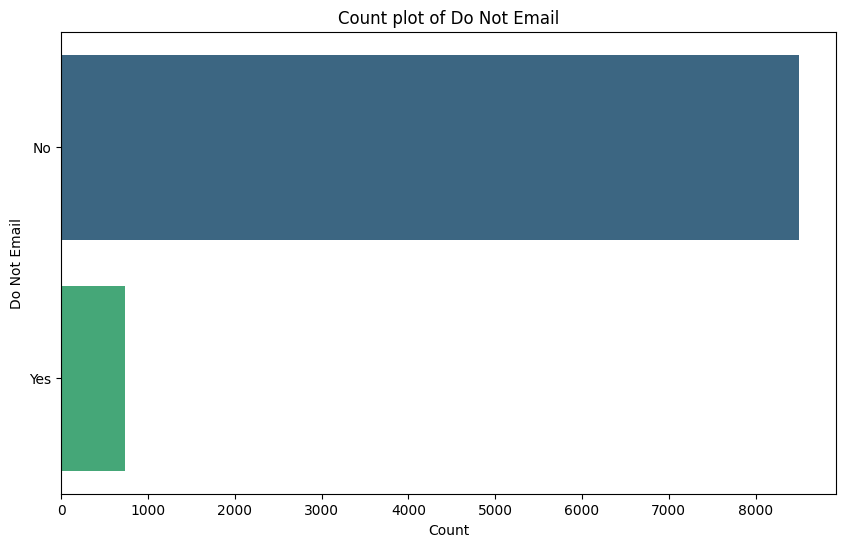

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Do Not Email.png
📊 Value Counts for Do Not Email:
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

📊 Proportions for Do Not Email:
Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


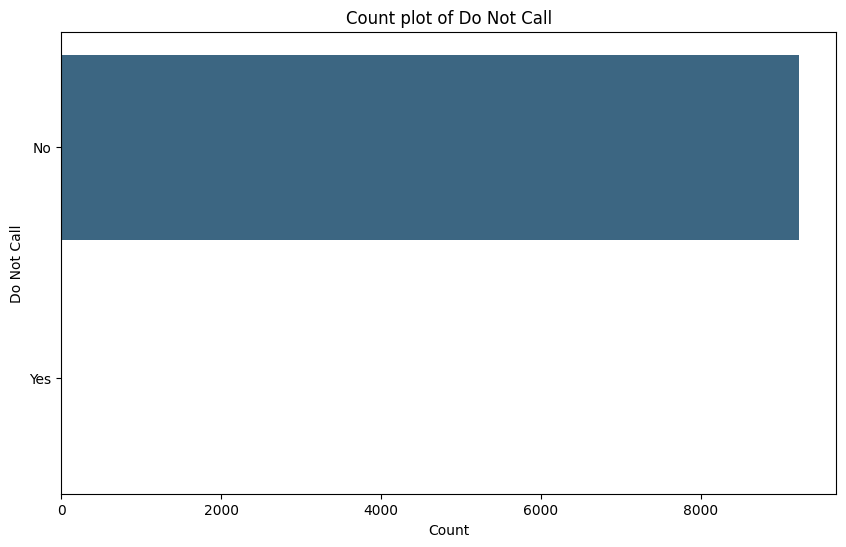

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Do Not Call.png
📊 Value Counts for Do Not Call:
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

📊 Proportions for Do Not Call:
Do Not Call
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


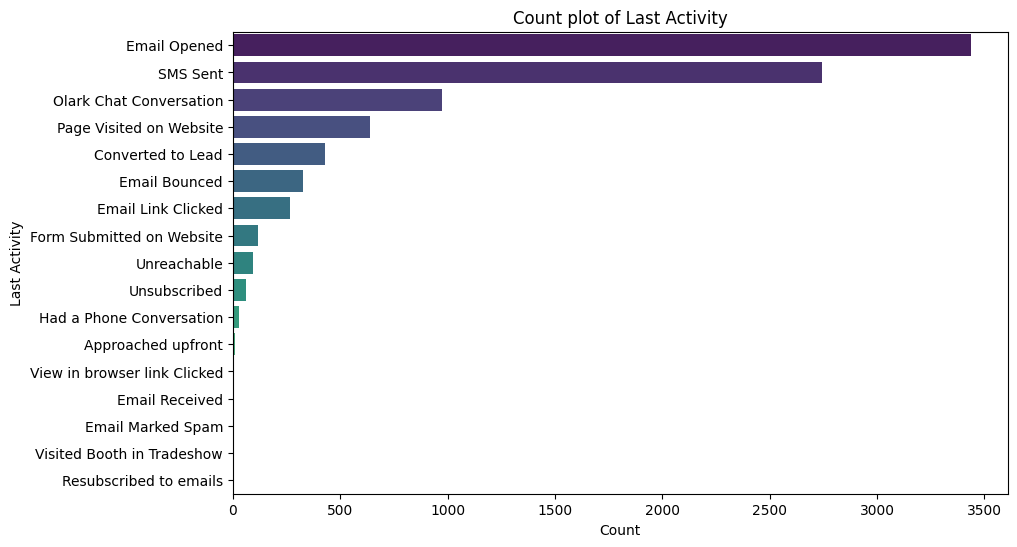

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Last Activity.png
📊 Value Counts for Last Activity:
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

📊 Proportions for Last Activity:
Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
C

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


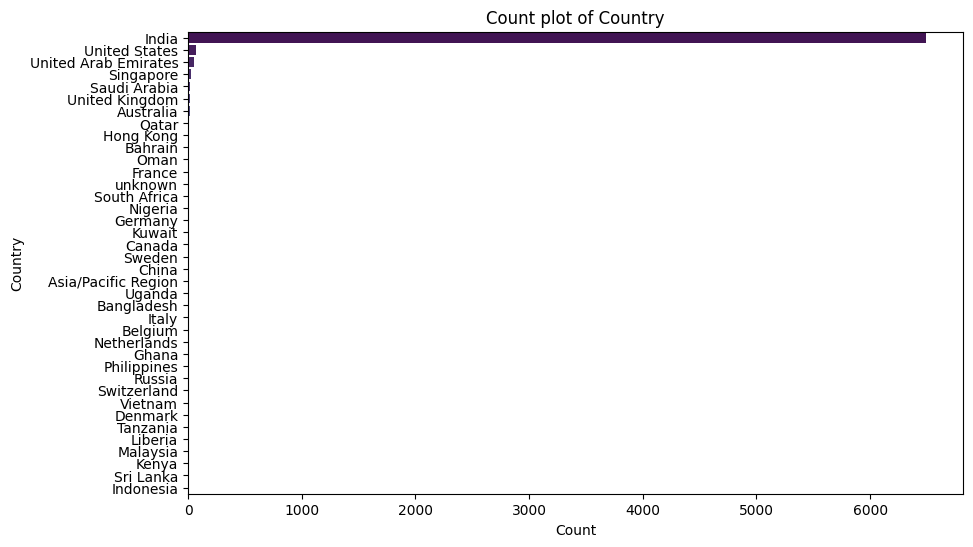

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Country.png
📊 Value Counts for Country:
Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam         

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


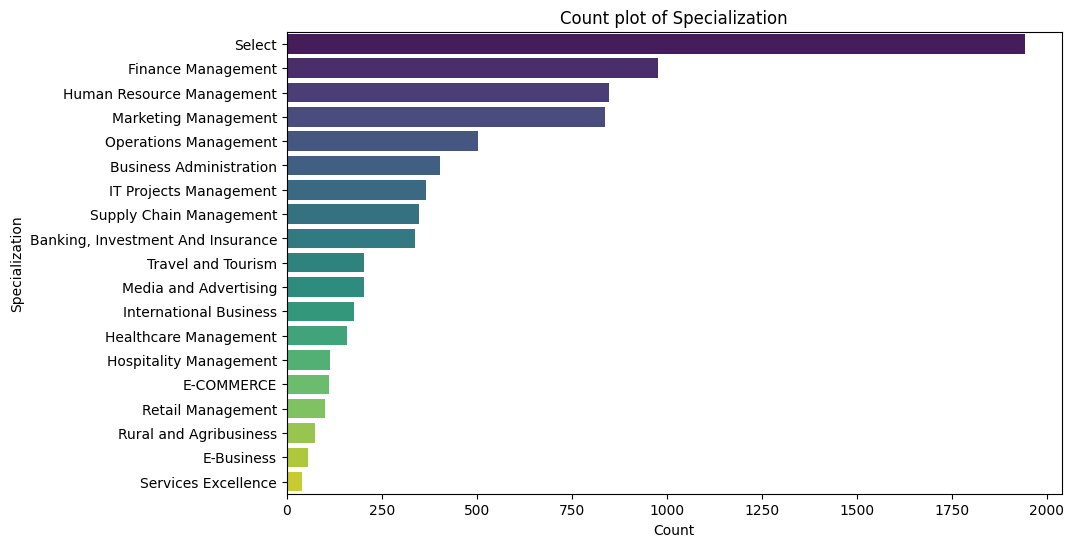

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Specialization.png
📊 Value Counts for Specialization:
Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

📊 Proportions for Specialization:
Specia

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


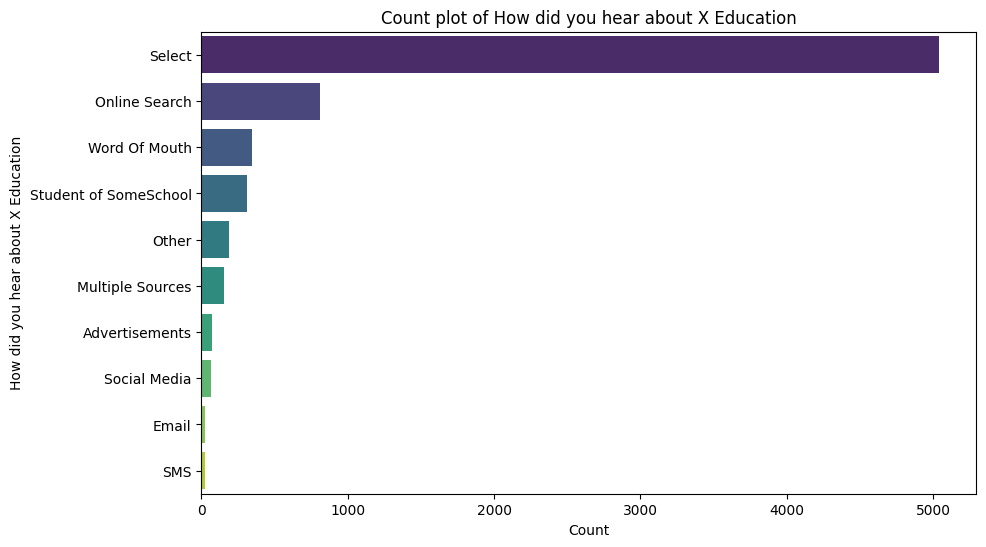

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_How did you hear about X Education.png
📊 Value Counts for How did you hear about X Education:
How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

📊 Proportions for How did you hear about X Education:
How did you hear about X Education
Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


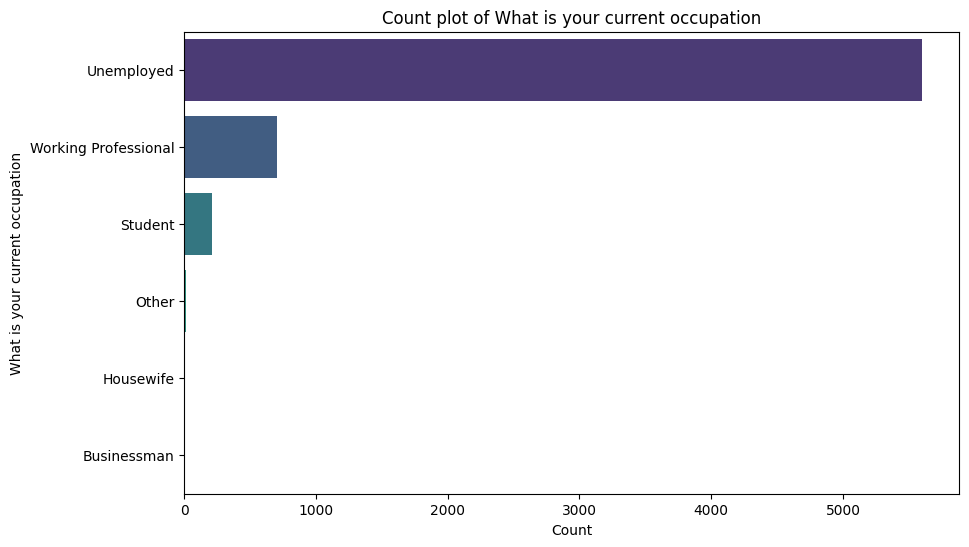

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_What is your current occupation.png
📊 Value Counts for What is your current occupation:
What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

📊 Proportions for What is your current occupation:
What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


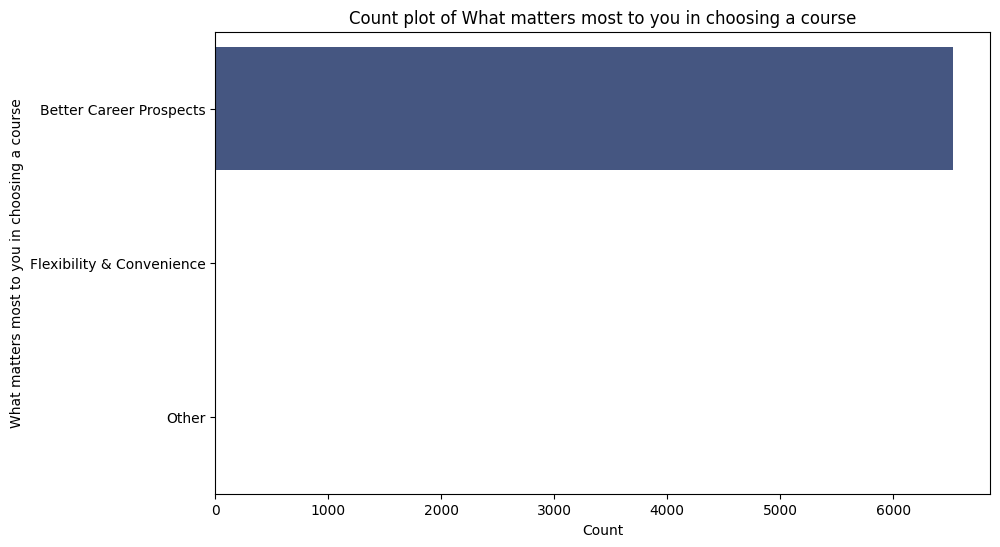

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_What matters most to you in choosing a course.png
📊 Value Counts for What matters most to you in choosing a course:
What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

📊 Proportions for What matters most to you in choosing a course:
What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


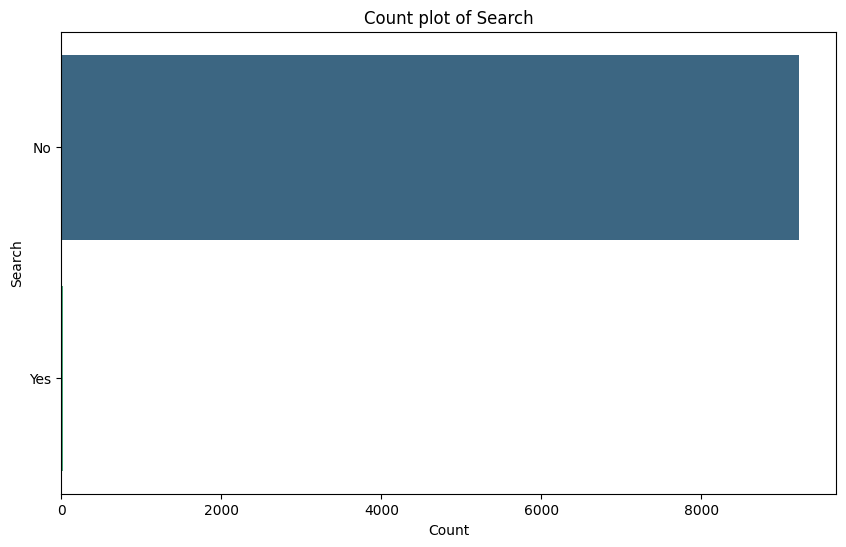

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Search.png
📊 Value Counts for Search:
Search
No     9226
Yes      14
Name: count, dtype: int64

📊 Proportions for Search:
Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64



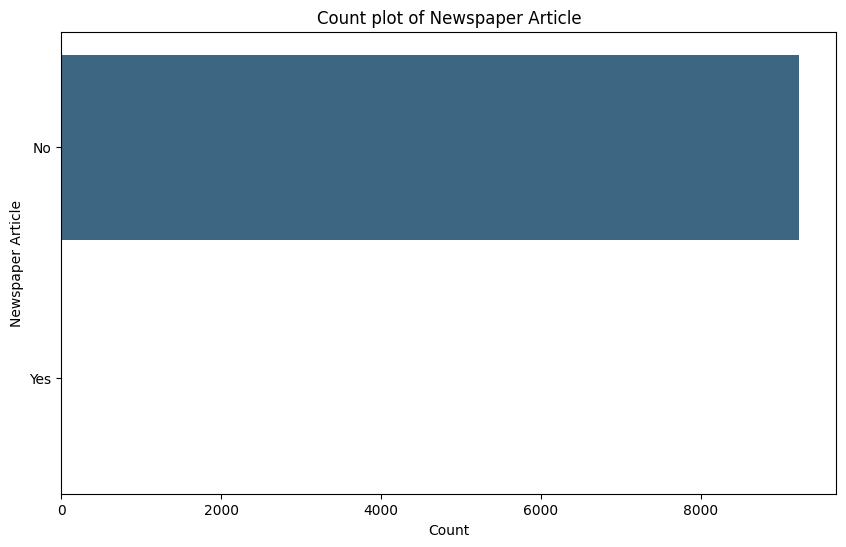

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Newspaper Article.png
📊 Value Counts for Newspaper Article:
Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

📊 Proportions for Newspaper Article:
Newspaper Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64



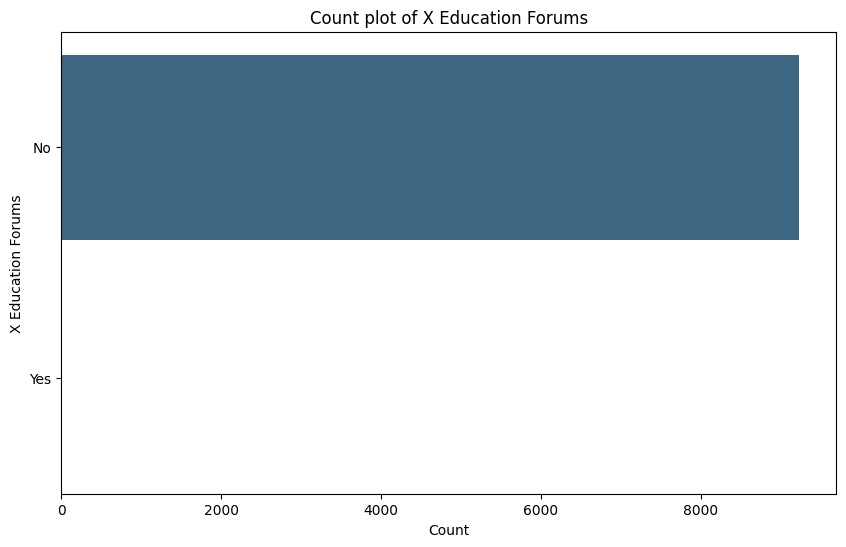

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_X Education Forums.png
📊 Value Counts for X Education Forums:
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

📊 Proportions for X Education Forums:
X Education Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


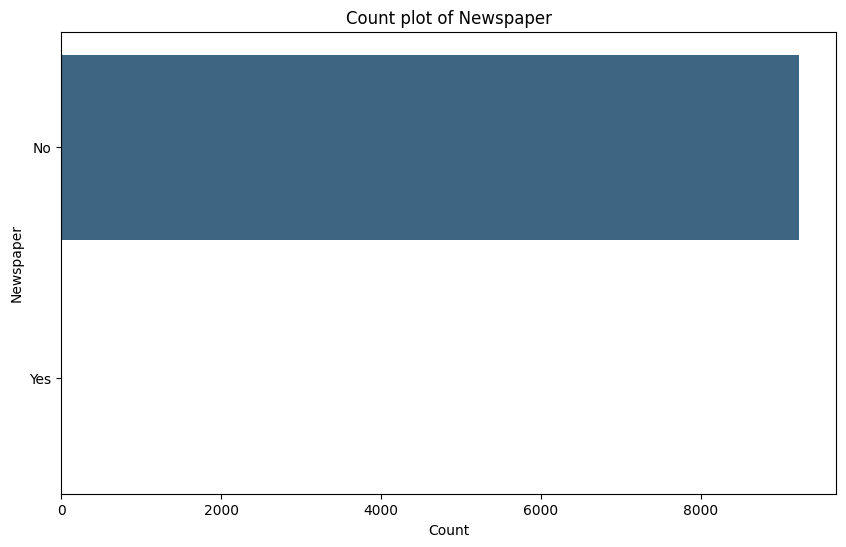

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Newspaper.png
📊 Value Counts for Newspaper:
Newspaper
No     9239
Yes       1
Name: count, dtype: int64

📊 Proportions for Newspaper:
Newspaper
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


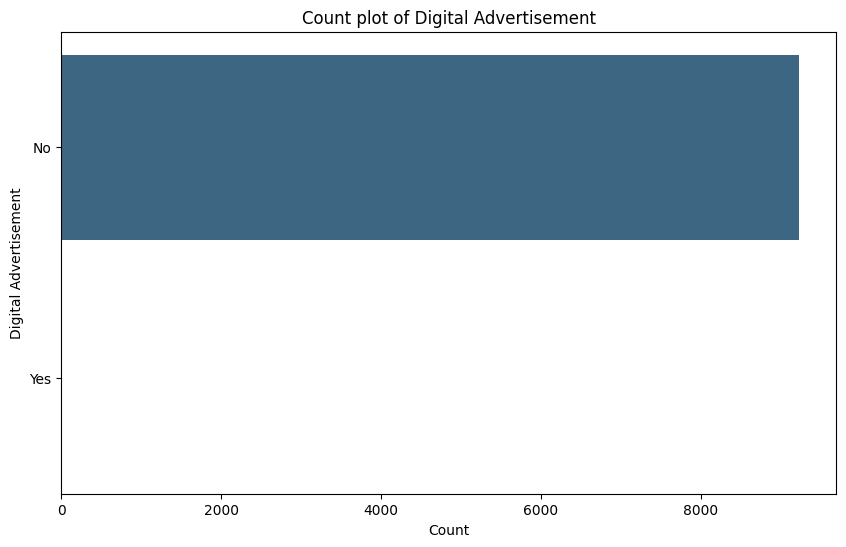

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Digital Advertisement.png
📊 Value Counts for Digital Advertisement:
Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

📊 Proportions for Digital Advertisement:
Digital Advertisement
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


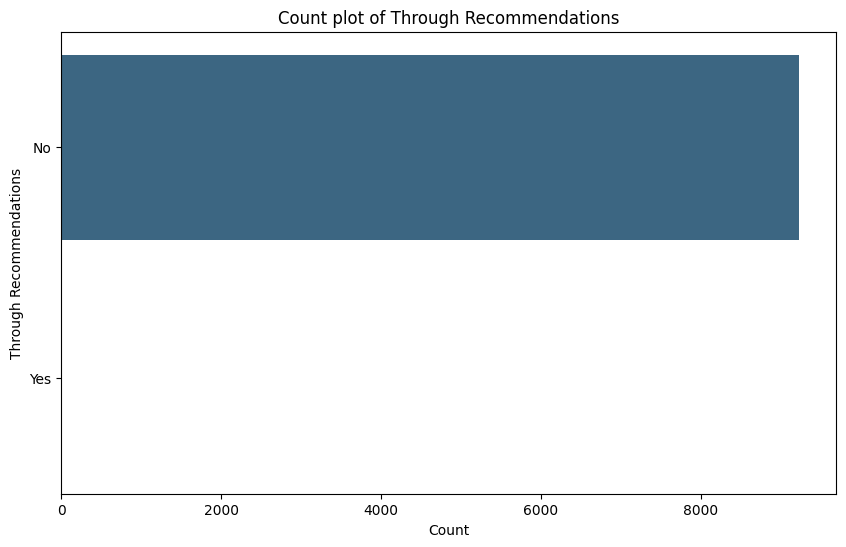

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Through Recommendations.png
📊 Value Counts for Through Recommendations:
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

📊 Proportions for Through Recommendations:
Through Recommendations
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


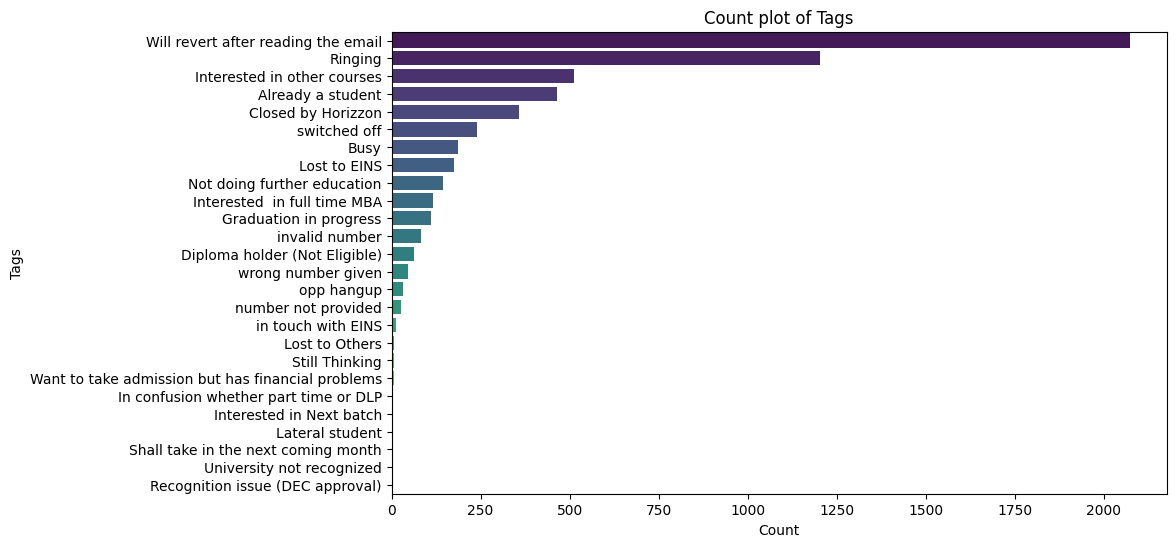

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Tags.png
📊 Value Counts for Tags:
Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided      

C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


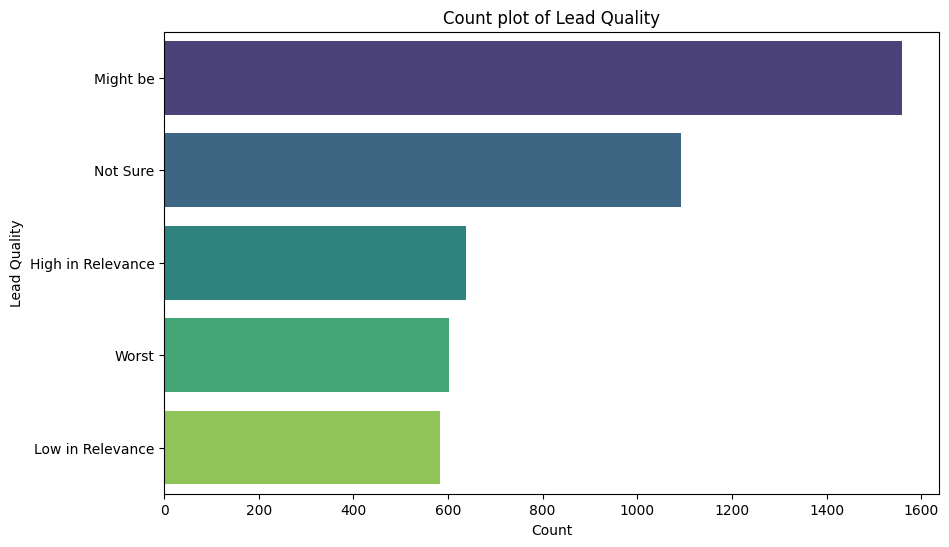

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Lead Quality.png
📊 Value Counts for Lead Quality:
Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

📊 Proportions for Lead Quality:
Lead Quality
Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


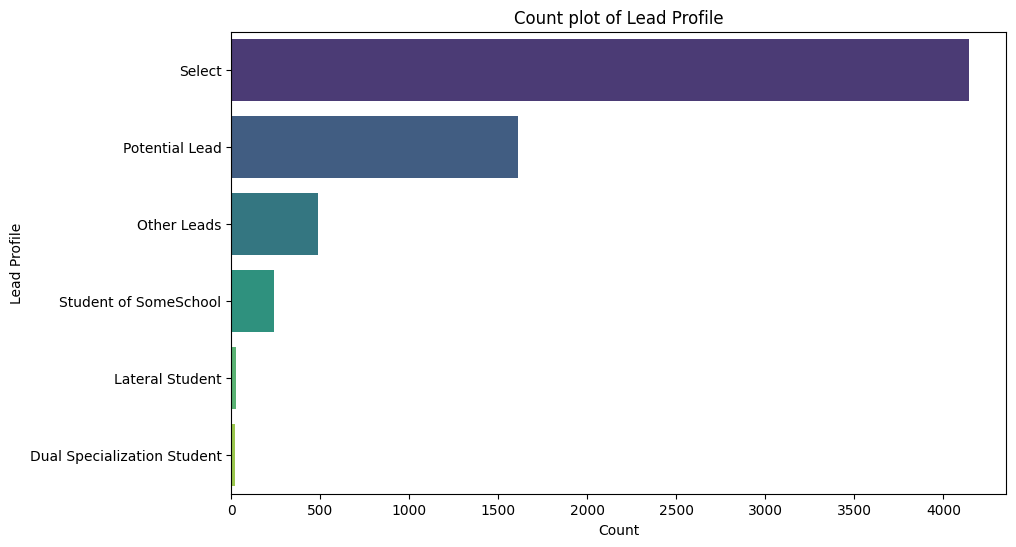

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Lead Profile.png
📊 Value Counts for Lead Profile:
Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

📊 Proportions for Lead Profile:
Lead Profile
Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


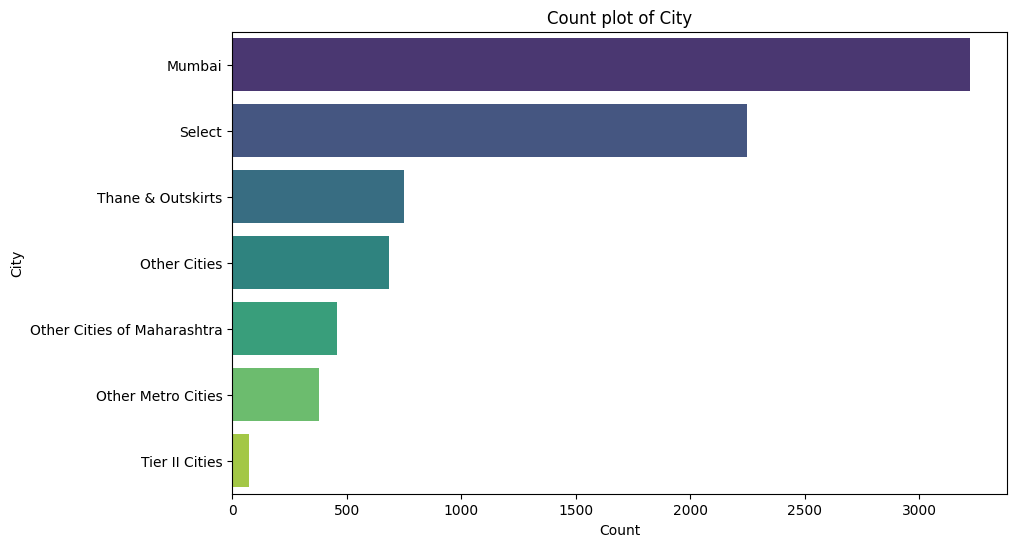

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_City.png
📊 Value Counts for City:
City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

📊 Proportions for City:
City
Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


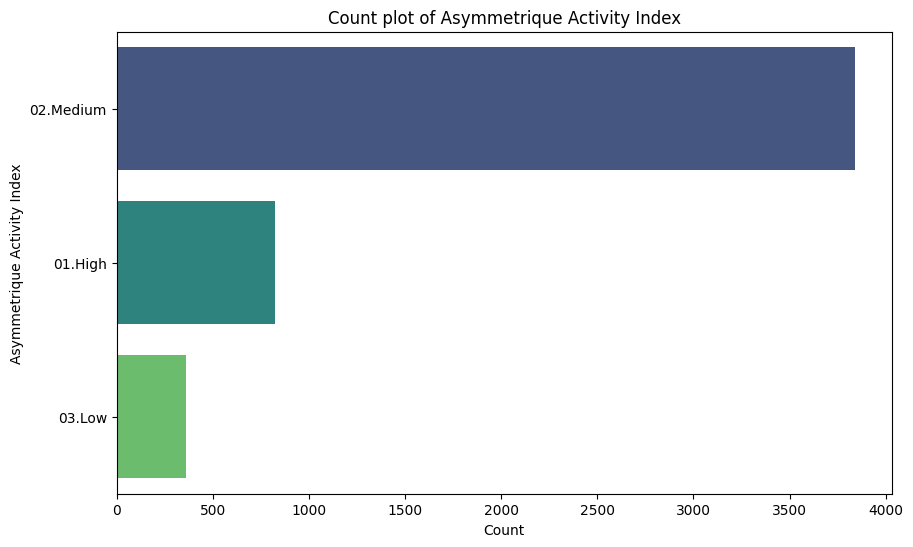

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Asymmetrique Activity Index.png
📊 Value Counts for Asymmetrique Activity Index:
Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

📊 Proportions for Asymmetrique Activity Index:
Asymmetrique Activity Index
02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


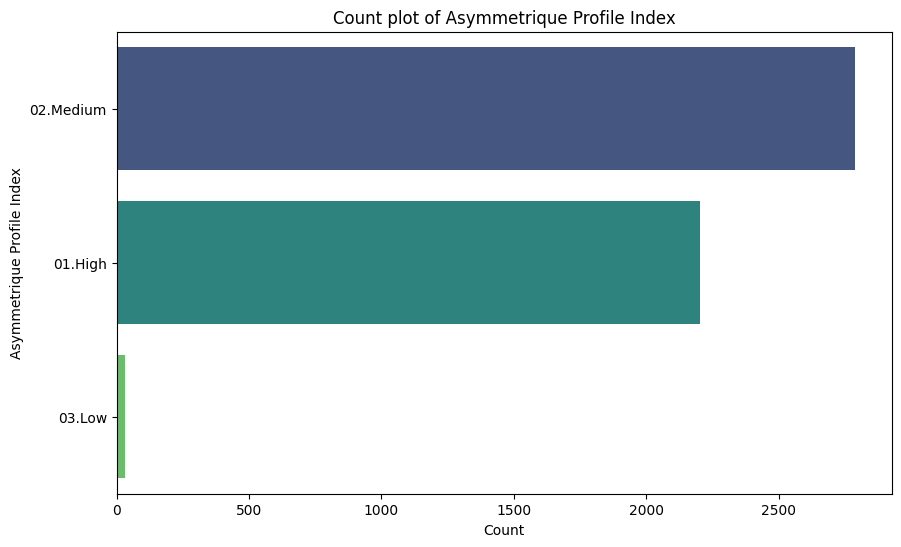

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Asymmetrique Profile Index.png
📊 Value Counts for Asymmetrique Profile Index:
Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

📊 Proportions for Asymmetrique Profile Index:
Asymmetrique Profile Index
02.Medium    0.555157
01.High      0.438670
03.Low       0.006173
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


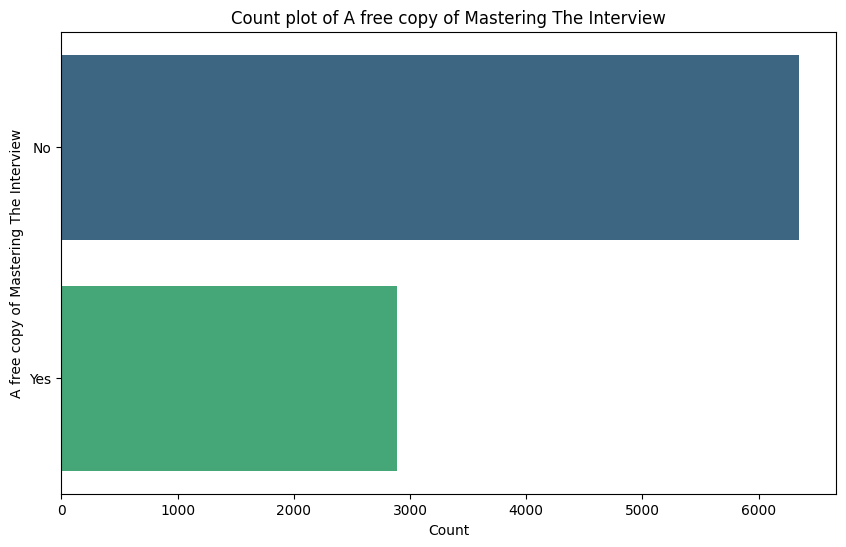

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_A free copy of Mastering The Interview.png
📊 Value Counts for A free copy of Mastering The Interview:
A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

📊 Proportions for A free copy of Mastering The Interview:
A free copy of Mastering The Interview
No     0.687446
Yes    0.312554
Name: proportion, dtype: float64



C:\Users\Minfy.CHILUKURIVASUSR\AppData\Local\Temp\ipykernel_6276\1529786468.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


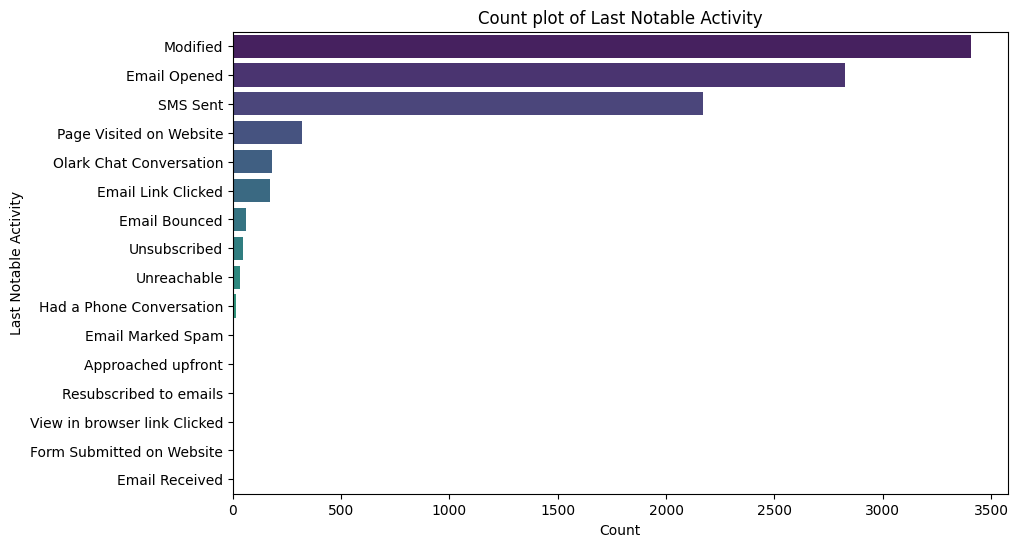

✅ Saved countplot: eda_plots/univariate_analysis\univariate_count_Last Notable Activity.png
📊 Value Counts for Last Notable Activity:
Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

📊 Proportions for Last Notable Activity:
Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.03441

In [17]:
def generate_univariate_plots(df):
    plot_dir = "eda_plots/univariate_analysis"
    os.makedirs(plot_dir, exist_ok=True)

    numerical_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(include='object').columns

    # 🔢 Univariate plots for numerical columns
    for col in numerical_cols:
        # Histogram + KDE
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        hist_path = os.path.join(plot_dir, f'univariate_hist_{col}.png')
        plt.savefig(hist_path, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved histogram: {hist_path}")

        # Boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], color='lightcoral')
        plt.title(f'Box plot of {col}')
        plt.xlabel(col)
        box_path = os.path.join(plot_dir, f'univariate_box_{col}.png')
        plt.savefig(box_path, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved boxplot: {box_path}")

        print(f"📊 Descriptive Statistics for {col}:\n{df[col].describe()}\n")

    # 🏷️ Univariate plots for categorical columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Count plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        countplot_path = os.path.join(plot_dir, f'univariate_count_{col}.png')
        plt.show()
        plt.savefig(countplot_path, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved countplot: {countplot_path}")

        print(f"📊 Value Counts for {col}:\n{df[col].value_counts()}\n")
        print(f"📊 Proportions for {col}:\n{df[col].value_counts(normalize=True)}\n")

generate_univariate_plots(df)

## THERE ARE SOME COLUMNS WHICH HAVE LOW VARIENCE MEANS THOSE COLUMNS CLASSES ARE UNI(ONLY SINGLE FEATURE) SO WE WILL REMOVE THOSE COLUMNS

✅ Saved boxplot: eda_plots\bivariate\bivariate_TotalVisits_vs_Converted.png
📊 Mean TotalVisits by Converted:
Converted
0    3.329670
1    3.633632
Name: TotalVisits, dtype: float64

✅ Saved boxplot: eda_plots\bivariate\bivariate_Total Time Spent on Website_vs_Converted.png
📊 Mean Total Time Spent on Website by Converted:
Converted
0    330.404473
1    738.546757
Name: Total Time Spent on Website, dtype: float64

✅ Saved boxplot: eda_plots\bivariate\bivariate_Page Views Per Visit_vs_Converted.png
📊 Mean Page Views Per Visit by Converted:
Converted
0    2.368453
1    2.353638
Name: Page Views Per Visit, dtype: float64

✅ Saved boxplot: eda_plots\bivariate\bivariate_Asymmetrique Activity Score_vs_Converted.png
📊 Mean Asymmetrique Activity Score by Converted:
Converted
0    14.123956
1    14.603774
Name: Asymmetrique Activity Score, dtype: float64

✅ Saved boxplot: eda_plots\bivariate\bivariate_Asymmetrique Profile Score_vs_Converted.png
📊 Mean Asymmetrique Profile Score by Converted:
Conv

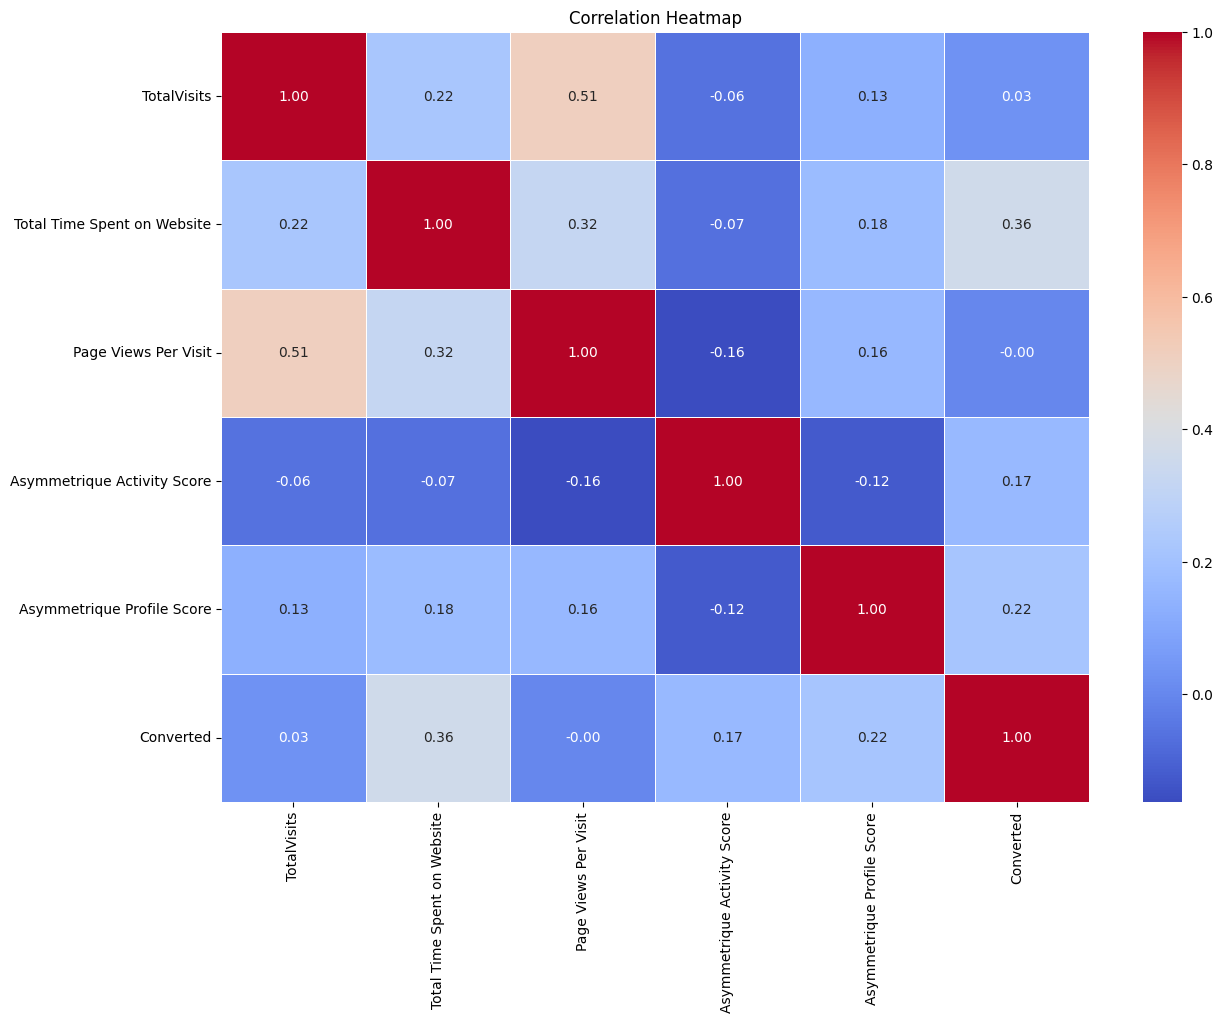

✅ Saved correlation heatmap: eda_plots\bivariate\correlation_heatmap.png


In [15]:
bivariate_dir = os.path.join("eda_plots", "bivariate")
os.makedirs(bivariate_dir, exist_ok=True)

def generate_bivariate_plots(df, target_col='Converted'):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if target_col in numerical_cols:
        numerical_cols.remove(target_col)
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)

    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs. {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)
        save_path = os.path.join(bivariate_dir, f'bivariate_{col}_vs_{target_col}.png')
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved boxplot: {save_path}")
        print(f"📊 Mean {col} by {target_col}:\n{df.groupby(target_col)[col].mean()}\n")

    for col in categorical_cols:
        plt.figure(figsize=(12, 7))
        sns.countplot(x=col, hue=target_col, data=df)
        plt.title(f'{col} vs. {target_col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target_col)
        plt.tight_layout()
        save_path = os.path.join(bivariate_dir, f'bivariate_{col}_vs_{target_col}.png')
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved countplot: {save_path}")
        print(f"📊 Cross-tabulation of {col} and {target_col}:\n{pd.crosstab(df[col], df[target_col])}\n")
        print(f"📊 Proportions within each {col} category:\n{pd.crosstab(df[col], df[target_col], normalize='index')}\n")

    # Correlation Heatmap
    plt.figure(figsize=(14, 10))
    corr = df[numerical_cols + [target_col]].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    heatmap_path = os.path.join(bivariate_dir, 'correlation_heatmap.png')
    plt.show()
    plt.savefig(heatmap_path, bbox_inches='tight')
    plt.close()
    print(f"✅ Saved correlation heatmap: {heatmap_path}")
generate_bivariate_plots(df, target_col='Converted')

## IN BIVARIATE ANALYSIS  WE OBSERVE THAT EXCEPT THE PROSPECT_ID,LEADNUMBER,AND IN UNIVARIATE ANALYSIS WE REMOVED SOME COLUMNS SO WE REMOVED ALL THOSE COLUMNS

In [18]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nSuggested Imputation Values:")

# Print mode for categorical columns
for col in categorical_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode().iloc[0]
        print(f"Categorical → {col}: Mode = {mode_val}")

# Print median for numerical columns
for col in numerical_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        print(f"Numerical → {col}: Median = {median_val:.2f}")


Suggested Imputation Values:
Categorical → Lead Source: Mode = Google
Categorical → Last Activity: Mode = Email Opened
Categorical → Country: Mode = India
Categorical → Specialization: Mode = Select
Categorical → How did you hear about X Education: Mode = Select
Categorical → What is your current occupation: Mode = Unemployed
Categorical → What matters most to you in choosing a course: Mode = Better Career Prospects
Categorical → Tags: Mode = Will revert after reading the email
Categorical → Lead Quality: Mode = Might be
Categorical → Lead Profile: Mode = Select
Categorical → City: Mode = Mumbai
Categorical → Asymmetrique Activity Index: Mode = 02.Medium
Categorical → Asymmetrique Profile Index: Mode = 02.Medium
Numerical → TotalVisits: Median = 3.00
Numerical → Page Views Per Visit: Median = 2.00
Numerical → Asymmetrique Activity Score: Median = 14.00
Numerical → Asymmetrique Profile Score: Median = 16.00


## THESE ARE THE SUGGESTED IMPUTED VAUES